<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day4/Demo_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Multi-Class Classification
We're using the IRIS dataset, a classic machine learning dataset that illustrates both linearly separable and non-linearly separable classes.

3 different types of irises’ (Setosa, Versicolour, and Virginica). There are 4 features in the dataset: sepal length, sepal width, petal length, petal width.

This dataset is so famous it even has a [Wikepdia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).

num_samples, num_features (150, 2)


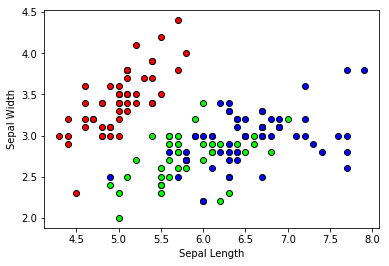

In [148]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


# Loading the dataset
iris = datasets.load_iris()
X = iris.data[:,:2] # using only first two features
y = iris.target

(num_samples, num_features) = X.shape
print("num_samples, num_features", X.shape)

plt.figure()
plt.plot(X[y==0,0], X[y==0,1], 'o', markerfacecolor=(1,0,0,1), markeredgecolor='black')
plt.plot(X[y==1,0], X[y==1,1], 'o', markerfacecolor=(0,1,0,1), markeredgecolor='black')
plt.plot(X[y==2,0], X[y==2,1], 'o', markerfacecolor=(0,0,1,1), markeredgecolor='black');

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# splitting the data into test and train
# We're not using ANY hyperparameters --- NO NEED FOR VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)#, random_state=42)

# sklearn does everything in the background:
#     - onehot encoding
#     - softmax output
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train))

yhat = logreg.predict(X_test)
acc = np.mean(yhat == y_test)
print("Accuracy on test data = %f" % acc)

0.84
Accuracy on test data = 0.760000


## Decision Boundary
[Code for plotting decission boundary](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

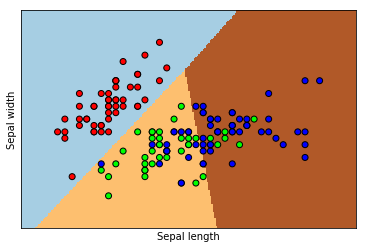

In [132]:
### CODE FROM SKLEARN IRIS DEMO ###

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure()
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(());

## Understanding The Classifications
### Confusion Matrix!

In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

[[14  0  0]
 [ 0 11  5]
 [ 1  6 13]]
(50,) (50, 3)
[[0.     1.     0.     0.    ]
 [0.     1.     0.     0.    ]
 [0.     1.     0.     0.    ]
 [1.     0.     0.7882 0.2118]
 [0.     1.     0.     0.    ]
 [2.     0.     0.3485 0.6515]
 [2.     0.     0.3307 0.6693]
 [1.     0.065  0.9126 0.0223]
 [0.     1.     0.     0.    ]
 [1.     0.     0.689  0.311 ]
 [2.     0.     0.4641 0.5359]
 [1.     0.     0.7882 0.2118]
 [2.     0.     0.3444 0.6556]
 [1.     0.     0.5584 0.4416]
 [2.     0.     0.1594 0.8406]
 [0.     0.9997 0.0003 0.0001]
 [0.     1.     0.     0.    ]
 [2.     0.     0.1819 0.8181]
 [1.     0.     0.8287 0.1713]
 [1.     0.0064 0.8492 0.1444]
 [1.     0.0003 0.9579 0.0418]
 [2.     0.     0.0448 0.9552]
 [1.     0.     0.5926 0.4074]
 [2.     0.     0.2841 0.7159]
 [0.     1.     0.     0.    ]
 [2.     0.     0.1015 0.8985]
 [2.     0.     0.2966 0.7034]
 [1.     0.     0.9829 0.0171]
 [0.     1.     0.     0.    ]
 [1.     0.     0.6116 0.3884]
 [2.     0.     0.4

### Class confidence outputs
In our print statement, the first column is our decision, cols 2-4 are our class proability outputs.

In [153]:
# showing the probabilities
yhat_probs = logreg.predict_proba(X_test)

np.set_printoptions(precision=4, suppress=True)
print(yhat.shape, yhat_probs.shape)
print(np.hstack([yhat.reshape(-1,1), yhat_probs]))

(50,) (50, 3)
[[0.     1.     0.     0.    ]
 [0.     1.     0.     0.    ]
 [0.     1.     0.     0.    ]
 [1.     0.     0.7882 0.2118]
 [0.     1.     0.     0.    ]
 [2.     0.     0.3485 0.6515]
 [2.     0.     0.3307 0.6693]
 [1.     0.065  0.9126 0.0223]
 [0.     1.     0.     0.    ]
 [1.     0.     0.689  0.311 ]
 [2.     0.     0.4641 0.5359]
 [1.     0.     0.7882 0.2118]
 [2.     0.     0.3444 0.6556]
 [1.     0.     0.5584 0.4416]
 [2.     0.     0.1594 0.8406]
 [0.     0.9997 0.0003 0.0001]
 [0.     1.     0.     0.    ]
 [2.     0.     0.1819 0.8181]
 [1.     0.     0.8287 0.1713]
 [1.     0.0064 0.8492 0.1444]
 [1.     0.0003 0.9579 0.0418]
 [2.     0.     0.0448 0.9552]
 [1.     0.     0.5926 0.4074]
 [2.     0.     0.2841 0.7159]
 [0.     1.     0.     0.    ]
 [2.     0.     0.1015 0.8985]
 [2.     0.     0.2966 0.7034]
 [1.     0.     0.9829 0.0171]
 [0.     1.     0.     0.    ]
 [1.     0.     0.6116 0.3884]
 [2.     0.     0.4733 0.5267]
 [1.     0.     0.6444 0.

## Attempt at polynomial feature engineering

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(9)
Xpoly = poly.fit_transform(X)

print(Xpoly.shape)

X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=0.33, random_state=42)

logreg = LogisticRegression(C=1e8, solver='lbfgs', multi_class='multinomial', max_iter=5000)
logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train))

yhat = logreg.predict(X_test)
acc = np.mean(yhat == y_test)
print("Accuracy on test data = %f" % acc)

(150, 55)
0.8
Accuracy on test data = 0.700000


## Onehot encoding function
This function is not! necessary for this demo. Only being kept on this notebook for future purposes.

Using the onehot functions in SKlearn and other libraries is **very annoying**.
We can make our own function that is much easier to understand.

In [157]:
def onehot_enc(y,num_classes):
  (N,K) = (y.shape[0], num_classes)
  I = np.eye(K)
  y_onehot = np.zeros((N,K))
  for i in range(N):
    y_onehot[i,:] = I[y[i],:]
  return y_onehot

y_onehot = onehot_enc(y, 3)

print(y_onehot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.